In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


image_data = pd.read_csv('features.csv')
print(image_data.size)

# Load the metadata file and concatenate it with the image data by id

metadata = pd.read_csv('train.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
image_data = pd.merge(image_data, metadata.drop('Pawpularity', axis=1), on='Id', how='outer')
image_data.head()


446040


,Id,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,...,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0007de18844b0dbbb5e1f607da0606e0,41.231567,0.000157,1278.492804,0.690157,2060.880358,0.062406,298.598931,6965.028630,8.182493,...,1,1,0,0,1,0,0,0,0,0
1,0009c66b9439883ba2750fb825e1d7db,23.987915,0.000773,457.965407,0.925960,3091.327100,0.281047,191.414256,11907.342991,8.376357,...,1,0,0,0,0,0,0,0,0,0
2,0013fd999caf9a3efe1352ca1b0d937e,24.436279,0.000233,724.338070,0.891415,3337.386293,0.116865,233.633501,12625.207100,8.503799,...,1,1,0,0,0,0,1,1,0,0
3,0018df346ac9c1d8413cfcc888ca8246,26.991699,0.000493,598.241637,0.880039,2493.181218,0.201182,313.177373,9374.483237,8.374829,...,1,1,0,0,0,0,0,0,0,0
4,001dc955e10590d3ca4673f034feeef2,39.300049,0.000133,1450.048193,0.750709,2908.689995,0.067109,258.257568,10184.711786,8.591187,...,0,1,0,0,1,0,0,0,0,0


In [43]:
X = image_data.drop('Id', axis=1).drop('Pawpularity', axis=1) #except the last and the first(Id)
y = image_data['Pawpularity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6343, 55)
y_train shape: (6343,)
X_val shape: (1586, 55)
y_val shape: (1586,)
X_test shape: (1983, 55)
y_test shape: (1983,)


C:\Users\HP\AppData\Local\Temp\ipykernel_17020\1021209620.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


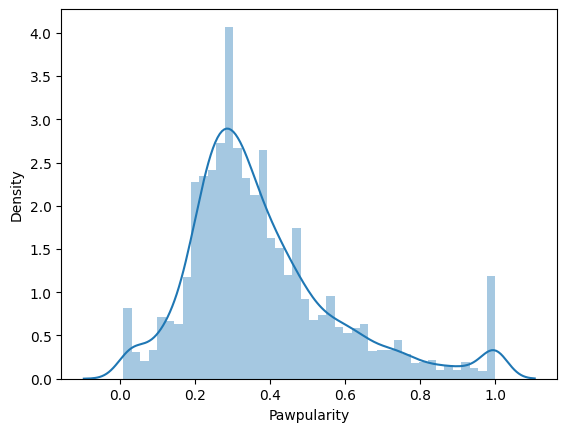

Total number of outliers:  162


C:\Users\HP\AppData\Local\Temp\ipykernel_17020\1021209620.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(of_y_train)


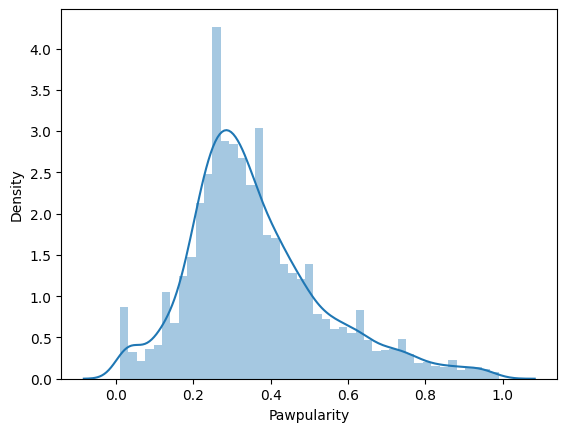

Mean before outlier removal: 0.3788428188554312
Standard deviation before outlier removal: 0.20269246552602357
Mean after outlier removal: 0.362562692121016
Standard deviation after outlier removal: 0.17827918157815797


In [44]:
# Remove the outliers from the training set

# Plot the target variable distribution
sns.distplot(y_train)
plt.show()

# Identify the outliers
outliers = [x for x in y_train if x >= 1]
print("Total number of outliers: ", len(outliers))

# Remove the outliers from the features
of_X_train = X_train[y_train < 1]

# Remove the outliers
of_y_train = y_train[y_train < 1]

# Plot the target distribution again to see if the outliers have been removed
sns.distplot(of_y_train)
plt.show()

# Print statistics before and after removing the outliers
print("Mean before outlier removal:", np.mean(y_train))
print("Standard deviation before outlier removal:", np.std(y_train))
print("Mean after outlier removal:", np.mean(of_y_train))
print("Standard deviation after outlier removal:", np.std(of_y_train))

# Linear Regression

In [45]:
## Using the whole training data
from sklearn.feature_selection import RFE

ftrs_lr = []
rmse_list_lr = []
r2_list_lr = []

for i in range(1, len(X_train.columns) + 1):
    # Create the RFE with a LinearRegression estimator and n_features_to_select = i
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)

    # Fit the eliminator to the data
    rfe.fit(X_train, y_train)

    # Selected features' names
    print(X_train.columns[rfe.support_])


    # Train the model
    model = LinearRegression()
    x_rfe=rfe.fit_transform(X_train, y_train)
    #get the selected features
    selected_features = X_train.columns[rfe.support_]
    model.fit(X_train[selected_features], y_train)

    # Make predictions
    y_pred = model.predict(X_val[selected_features])

    rmse_list_lr.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list_lr.append(r2_score(y_val, y_pred))

    ftrs_lr.append(selected_features)


    print(f"Selected Features: {i}")
    # Display the metrics of the best model
    print(f"Selected Features: {selected_features}")
    print(f"Coefficients: {model.coef_}")
    print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
    print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Index(['haralick_1'], dtype='object')
Selected Features: 1
Selected Features: Index(['haralick_1'], dtype='object')
Coefficients: [-1.08126656e-05]
Mean squared error: 0.21296
Coefficient of determination: 0.00004
Index(['haralick_1', 'haralick_3'], dtype='object')
Selected Features: 2
Selected Features: Index(['haralick_1', 'haralick_3'], dtype='object')
Coefficients: [-1.19650858e-05  1.86773792e-06]
Mean squared error: 0.21287
Coefficient of determination: 0.00087
Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Selected Features: 3
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Coefficients: [-13346187.73969971  53384750.95875273 -13346187.73968771]
Mean squared error: 0.21287
Coefficient of determination: 0.00085
Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Selected Features: 4
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Coefficients: [-4

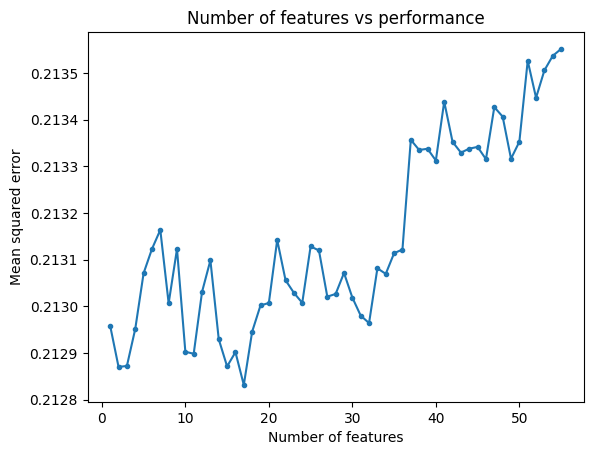

In [46]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(X_train.columns)+1), rmse_list_lr, marker='.')
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [47]:
# Get the best performing model and display the results
best_idx = np.argmin(rmse_list_lr)
print(f"Best number of features: {best_idx+1}")
print(f"RMSE of best model: {rmse_list_lr[best_idx]}")
print(f"R2 score of best model: {r2_list_lr[best_idx]}")
print(f"Selected features: {ftrs_lr[best_idx]}")

Best number of features: 17
RMSE of best model: 0.21283153425144546
R2 score of best model: 0.001230569540542903
Selected features: Index(['haralick_1', 'haralick_2', 'haralick_3', 'haralick_6', 'haralick_9',
       'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88',
       'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91'],
      dtype='object')


In [48]:
from sklearn.feature_selection import RFE

ftrs_lr_of = []
rmse_list_lr_of = []
r2_list_lr_of = []

for i in range(1, len(of_X_train.columns) + 1):
    # Create the RFE with a LinearRegression estimator and n_features_to_select = i
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)

    # Fit the eliminator to the data
    rfe.fit(of_X_train, of_y_train)

    # Selected features' names
    print(of_X_train.columns[rfe.support_])


    # Train the model
    model = LinearRegression()
    x_rfe=rfe.fit_transform(of_X_train, of_y_train)
    #get the selected features
    selected_features = of_X_train.columns[rfe.support_]
    model.fit(of_X_train[selected_features], of_y_train)

    # Make predictions
    y_pred = model.predict(X_val[selected_features])

    rmse_list_lr_of.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list_lr_of.append(r2_score(y_val, y_pred))

    ftrs_lr_of.append(selected_features)


    print(f"Selected Features: {i}")
    # Display the metrics of the best model
    print(f"Selected Features: {selected_features}")
    print(f"Coefficients: {model.coef_}")
    print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
    print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Index(['haralick_3'], dtype='object')
Selected Features: 1
Selected Features: Index(['haralick_3'], dtype='object')
Coefficients: [-4.95108861e-07]
Mean squared error: 0.21432
Coefficient of determination: -0.01275
Index(['haralick_3', 'haralick_6'], dtype='object')
Selected Features: 2
Selected Features: Index(['haralick_3', 'haralick_6'], dtype='object')
Coefficients: [-3.41688656e-05  8.78568118e-06]
Mean squared error: 0.21410
Coefficient of determination: -0.01068
Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Selected Features: 3
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6'], dtype='object')
Coefficients: [ 1.24998038e+08 -4.99992153e+08  1.24998038e+08]
Mean squared error: 0.21405
Coefficient of determination: -0.01024
Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Selected Features: 4
Selected Features: Index(['haralick_1', 'haralick_3', 'haralick_6', 'haralick_9'], dtype='object')
Coefficients: [ 1.03967

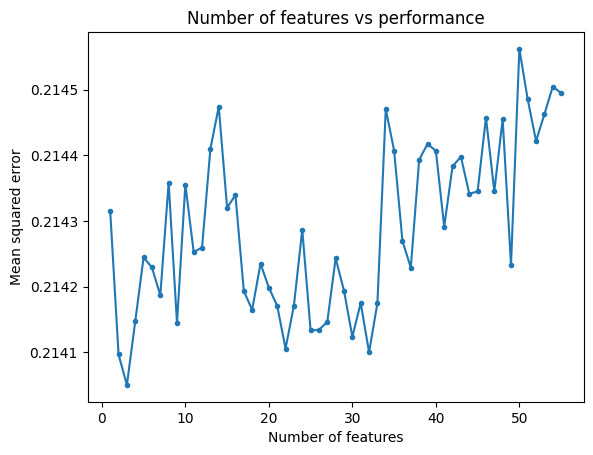

In [49]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(X_train.columns) +1), rmse_list_lr_of, marker='.')
plt.xlabel('Number of features')
plt.ylabel('Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [50]:
# Get the features that give lowest rmse
best = np.argmin(rmse_list_lr_of)
print(f"Best number of features: {best+1}")

Best number of features: 3


# SVR model

In [51]:
# Apply a SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

rmse_list_svr = []
r2_list_svr = []
estimators_svr = []

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}


# Perform grid search on scaled data
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator_svr = grid.best_estimator_

# Print the best estimator, parameters and best score
print(f"Best estimator: {best_estimator_svr}")
print(f"Best parameters: {best_params}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_svr.predict(X_val_scaled)
rmse_list_svr.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list_svr.append(r2_score(y_val, y_pred))

estimators_svr.append(best_estimator_svr)

print(f"Selected Features: {i}")
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   2.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   2.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.034 total time=   2.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   1.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.013 total time=   1.7s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.008 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.006 total time=   1.2s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.020 total time=   1.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.003 total time=   1.7s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.013 total time=   2.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.020 total time=   2.1s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;

In [52]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_svr.predict(X_val_scaled)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21460
Coefficient of determination: -0.01544


In [53]:
# Apply a SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ftrs = []
rmse_list = []
r2_list = []
estimators = []

# Scale the features
scaler_of = MinMaxScaler()
X_train_scaled = scaler_of.fit_transform(of_X_train)
X_val_scaled = scaler_of.transform(X_val)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}

# Perform grid search on scaled data
svr_of_model = SVR()
grid = GridSearchCV(svr_of_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, of_y_train)

# Get the best parameters
best_params_of = grid.best_params_

# Get the best estimator
best_estimator_of = grid.best_estimator_

# Print the best estimator, parameters and best score
print(f"Best estimator: {best_estimator_of}")
print(f"Best parameters: {best_params_of}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_of.predict(X_val_scaled)
rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))

ftrs.append(selected_features)
estimators.append(best_estimator_of)

print(f"Selected Features: {i}")
# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   1.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   1.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.037 total time=   1.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   1.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   1.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.002 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.007 total time=   0.7s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.010 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.008 total time=   0.6s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.010 total time=   0.7s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.005 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;

In [54]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_of.predict(X_val_scaled)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21568
Coefficient of determination: -0.02565


# Decision tree Regressor

In [55]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid.best_params_

# Get the best estimator
best_estimator_dt = grid.best_estimator_

best_params_dt, best_estimator_dt

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.017 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.019 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.004 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.017 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.019 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

({'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=8))

In [56]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_dt.predict(X_val)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))


Mean squared error: 0.21325
Coefficient of determination: -0.00274


In [57]:
# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(of_X_train, of_y_train)

# Get the best parameters
best_params_dt_of = grid.best_params_

# Get the best estimator
best_estimator_dt_of = grid.best_estimator_

best_params_dt_of, best_estimator_dt_of

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.003 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.010 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.003 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.010 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.002 total time=   0.0s
[CV 

({'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=4, min_samples_split=4))

In [58]:
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_dt_of.predict(X_val)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21545
Coefficient of determination: -0.02349


# Random Forest Regressor

In [59]:
## Using the whole training data
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))


# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21513
Coefficient of determination: -0.02046


In [60]:
## Using the whole training data

# Train the model
model_rf_of = RandomForestRegressor()
model_rf_of.fit(of_X_train, of_y_train)

# Make predictions
y_pred = model_rf_of.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))


# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21485
Coefficient of determination: -0.01781


# Random Forest 80 trees

In [61]:
# Train the model
model_rf_80 = RandomForestRegressor(n_estimators=80)
model_rf_80.fit(X_train, y_train)

# Make predictions
y_pred = model_rf_80.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))


# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21298
Coefficient of determination: -0.00018


In [62]:
## Using the whole training data

# Train the model
model_rf_of_80 = RandomForestRegressor(n_estimators=80)
model_rf_of_80.fit(of_X_train, of_y_train)

# Make predictions
y_pred = model_rf_of_80.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))


# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21472
Coefficient of determination: -0.01655


# Random Forest 30 trees

In [63]:
# Train the model
model_rf_30 = RandomForestRegressor(n_estimators=80)
model_rf_30.fit(X_train, y_train)

# Make predictions
y_pred = model_rf_30.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))


# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21318
Coefficient of determination: -0.00208


In [64]:
## Using the whole training data

# Train the model
model_rf_of_30 = RandomForestRegressor(n_estimators=80)
model_rf_of_30.fit(of_X_train, of_y_train)

# Make predictions
y_pred = model_rf_of_30.predict(X_val)

rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
r2_list.append(r2_score(y_val, y_pred))


# Display the metrics of the best model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21459
Coefficient of determination: -0.01537


# Ridge Regression

In [65]:
# Ridge regression

from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE


# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = range(1, len(X_train.columns) + 1)

# Create a dictionary to store the results
results = {'alpha': [], 'num_features': [], 'rmse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(X_train, y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, y_train)

        # Make predictions on the test set
        x_test_rfe = rfe.transform(X_val)
        y_pred = ridge_model.predict(x_test_rfe)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Store results in the dictionary
        results['alpha'].append(alpha)
        results['num_features'].append(num_features)
        results['rmse'].append(rmse)
        results['r2'].append(r2)
        results['features_selected'].append(list(X_train.columns[rfe.support_]))
        results['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(X_train.columns[rfe.support_])}")
        print(f"RMSE: {rmse}")
        print(f"R^2: {r2}")        



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 1
Features Selected: ['haralick_12']
RMSE: 0.2130288262949499
R^2: -0.0006219810569085826


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 2
Features Selected: ['haralick_9', 'haralick_12']
RMSE: 0.21302917721030196
R^2: -0.0006252776427282392


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 3
Features Selected: ['haralick_9', 'haralick_12', 'hog_90']
RMSE: 0.21305618480548102
R^2: -0.0008790099797246764


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 4
Features Selected: ['haralick_9', 'haralick_12', 'hog_27', 'hog_90']
RMSE: 0.21284604295560386
R^2: 0.0010943928770626998


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 5
Features Selected: ['haralick_9', 'haralick_12', 'hog_27', 'hog_96', 'hog_90']
RMSE: 0.21305131890481158
R^2: -0.0008332931915902009


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 6
Features Selected: ['haralick_9', 'haralick_12', 'hog_27', 'hog_96', 'hog_90', 'hog_50']
RMSE: 0.2128702430039205
R^2: 0.0008672339611016655


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 7
Features Selected: ['haralick_9', 'haralick_12', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21282563532614465
R^2: 0.0012859333721840782


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 8
Features Selected: ['haralick_9', 'haralick_12', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2126836436943503
R^2: 0.002618120015769887


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 9
Features Selected: ['haralick_9', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21259726435835477
R^2: 0.0034281088602663434


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 10
Features Selected: ['haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21259386840717207
R^2: 0.0034599463580133882


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 11
Features Selected: ['haralick_7', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2125603685776634
R^2: 0.0037739844992108473


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 12
Features Selected: ['haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21262189648742208
R^2: 0.0031971641244135096


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 13
Features Selected: ['haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'Collage']
RMSE: 0.2128109386377753
R^2: 0.0014238611419939984


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 14
Features Selected: ['haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_91', 'Collage']
RMSE: 0.21274903773140666
R^2: 0.0020046938627517052


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 15
Features Selected: ['haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21277638639020227
R^2: 0.0017480949357285835


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 16
Features Selected: ['haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21269392876759255
R^2: 0.0025216537944614537


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 17
Features Selected: ['haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21273342445127172
R^2: 0.002151170751080622


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 18
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21273804102769972
R^2: 0.0021078611923628365


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 19
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.2127652792639596
R^2: 0.0018523115804910395


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 20
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21295769733386932
R^2: 4.61099338404658e-05


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 21
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21287615340786256
R^2: 0.0008117507696834281


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 22
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21301211145538132
R^2: -0.0004649639994656063


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 23
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21302204197473396
R^2: -0.0005582485381177005


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 24
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage', 'Blur']
RMSE: 0.2130572408126909
R^2: -0.0008889316637259448


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 25
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Face', 'Collage', 'Blur']
RMSE: 0.2130297893368438
R^2: -0.0006310281242247751


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 26
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.2131391603056843
R^2: -0.0016587536734224972


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 27
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.2130867213357232
R^2: -0.0011659348812540493


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.21303599943702045
R^2: -0.0006893684109734455


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 29
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.21300577354815417
R^2: -0.00040542973401502813


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 30
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.2129910154908597
R^2: -0.0002668088042425687


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 31
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.21308193579494078
R^2: -0.0011209666487770331


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 32
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.21307656323088037
R^2: -0.001070483545188683

Alpha: 0.01, Num Features: 33
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21312552146476296
R^2: -0.00153056486683667


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 34
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21311206287017032
R^2: -0.0014040782015567466


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 35
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21334179830999286
R^2: -0.003564275093786984

Alpha: 0.01, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21335956981089096
R^2: -0.003731477080

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.2133305295653706
R^2: -0.003458261073576274

Alpha: 0.01, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE:

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2133706546570833
R^2: -0.0038357751727378098

Alpha: 0.01, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Grou

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21334973497905124
R^2: -0.003638944996714022

Alpha: 0.01, Num Features: 42
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'A

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 43
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21334043653892001
R^2: -0.0035514635355384794

Alpha: 0.01, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'h

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.01, Num Features: 46
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21350875862256588
R^2: -0.005135659327258901

Alpha: 0.01, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_4

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.01, Num Features: 49
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.2135900392715626
R^2: -0.0059010951816727

Alpha: 0.01, Num Features: 50
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'hog_95', 'hog_49', 'hog_27', 'ho

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.01, Num Features: 53
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21354019332043364
R^2: -0.005431651509554936

Alpha: 0.01, Num Features: 54
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_m

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 2
Features Selected: ['haralick_12', 'hog_90']
RMSE: 0.21303625538217935
R^2: -0.0006917729036783893


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 3
Features Selected: ['haralick_12', 'hog_90', 'hog_99']
RMSE: 0.21305891335663626
R^2: -0.0009046461007196083


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 4
Features Selected: ['haralick_12', 'hog_27', 'hog_90', 'hog_99']
RMSE: 0.2128605214507433
R^2: 0.0009584904973386488


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 5
Features Selected: ['haralick_0', 'haralick_12', 'hog_27', 'hog_90', 'hog_99']
RMSE: 0.21283219222406324
R^2: 0.001224394102726789


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 6
Features Selected: ['haralick_0', 'haralick_12', 'hog_27', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2125931168658462
R^2: 0.0034669920900001205


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 7
Features Selected: ['haralick_0', 'haralick_12', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2127371588956538
R^2: 0.002116136823789083


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 8
Features Selected: ['haralick_0', 'haralick_12', 'lbp_mean', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2128030835942222
R^2: 0.0014975764721369966


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 9
Features Selected: ['haralick_0', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2126461073059447
R^2: 0.002970143417967086

Alpha: 0.1, Num Features: 10
Features Selected: ['haralick_0', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2126458235361073
R^2: 0.0029728044289308864


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 11
Features Selected: ['haralick_0', 'haralick_7', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.21262698341189412
R^2: 0.0031494670482371534


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 12
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50']
RMSE: 0.2126331187147384
R^2: 0.003091938431223684


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 13
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'Collage']
RMSE: 0.2128090937600744
R^2: 0.001441174564675185


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 14
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_91', 'Collage']
RMSE: 0.2127474582244076
R^2: 0.002019512587539518


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 15
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21277359492039247
R^2: 0.0017742874265761488


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 16
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21269002580211122
R^2: 0.00255826121298508


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 17
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21271840295709962
R^2: 0.0022920856186451344


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 18
Features Selected: ['haralick_0', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21263232147437955
R^2: 0.0030994139727158476


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 19
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21266033533106307
R^2: 0.002836717599798644


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 20
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.2128309828183011
R^2: 0.0012357450316279328


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 21
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21296517620119093
R^2: -2.412611664626141e-05


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 22
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21297393659319494
R^2: -0.00010640044618392963


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 23
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage', 'Blur']
RMSE: 0.21300688753406133
R^2: -0.0004158936800928714


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 24
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Face', 'Collage', 'Blur']
RMSE: 0.21297975748113168
R^2: -0.00016106992292885813

Alpha: 0.1, Num Features: 25
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.21308836036971843
R^2: -0.001181336604109573


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 26
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.2130365702179211
R^2: -0.0006947306515867613

Alpha: 0.1, Num Features: 27
Features Selected: ['haralick_0', 'haralick_2', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.21298549047560225
R^2: -0.0002149153693153938


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Collage', 'Blur']
RMSE: 0.21296926469368405
R^2: -6.252328985323352e-05


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 29
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.21306418045390635
R^2: -0.0009541340776335616


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 30
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Group', 'Collage', 'Blur']
RMSE: 0.213059323265163
R^2: -0.0009084974274449209

Alpha: 0.1, Num Features: 31
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.2131099674803885
R^2: -0.0013843860121147689


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 32
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21307869118571626
R^2: -0.0010904786434888791

Alpha: 0.1, Num Features: 33
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21306668693499747
R^2: -0.000977684609327456


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 34
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21329790247481
R^2: -0.00315134372819581

Alpha: 0.1, Num Features: 35
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21331502806036517
R^2: -0.0033124352685394154


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.21328556151367375
R^2: -0.0030352666972714992

Alpha: 0.1, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2134110470625492
R^2: -0.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21333118933886533
R^2: -0.003464467931908466

Alpha: 0.1, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlu

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2132994973121491
R^2: -0.0031663449933962973

Alpha: 0.1, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 42
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21330854832924764
R^2: -0.0032514822627878193

Alpha: 0.1, Num Features: 43
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 45
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21339298225330255
R^2: -0.004045873534961331

Alpha: 0.1, Num Features: 46
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21342727895677852
R^2: -0.004368641701804288

Alpha: 0.1, Num Features: 48
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', '

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.1, Num Features: 50
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21351065417678608
R^2: -0.005153506816147679

Alpha: 0.1, Num Features: 51
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.17826e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.1, Num Features: 53
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.2135031995964656
R^2: -0.005083319529490815

Alpha: 0.1, Num Features: 54
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean

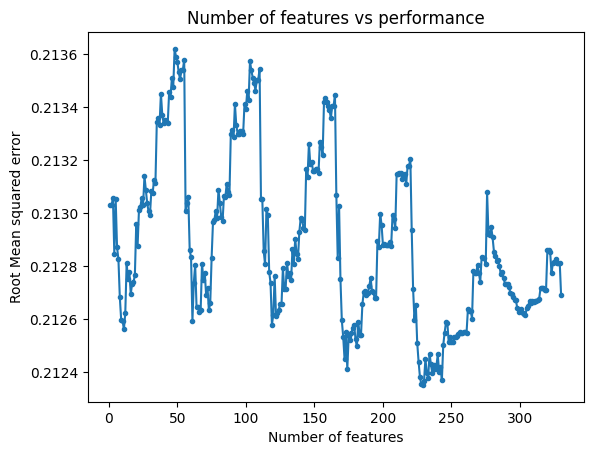

In [66]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(results['rmse']) +1), results['rmse'][:], marker='.')
plt.xlabel('Number of features')
plt.ylabel('Root Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [67]:
# Print the results of the best model
best_model_idx = np.argmin(results['rmse'])
print(f"N features: {results['num_features'][best_model_idx]}")
print(f"Best model: {results['features_selected'][best_model_idx]}")
print(f"Best rmse: {results['rmse'][best_model_idx]}")
print(f"Best r2: {results['r2'][best_model_idx]}")
print(f"Best alpha: {results['alpha'][best_model_idx]}")

N features: 9
Best model: ['lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_103', 'hog_31', 'hog_96', 'hog_90', 'hog_50']
Best rmse: 0.21235068371154553
Best r2: 0.00573851331772901
Best alpha: 100


In [68]:
# Ridge regression

from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE


# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = range(1, len(X_train.columns) + 1)

# Create a dictionary to store the results
results_ridge_of = {'alpha': [], 'num_features': [], 'rmse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(of_X_train, of_y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, of_y_train)

        # Make predictions on the test set
        x_test_rfe = rfe.transform(X_val)
        y_pred = ridge_model.predict(x_test_rfe)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Store results in the dictionary
        results_ridge_of['alpha'].append(alpha)
        results_ridge_of['num_features'].append(num_features)
        results_ridge_of['rmse'].append(rmse)
        results_ridge_of['r2'].append(r2)
        results_ridge_of['features_selected'].append(list(of_X_train.columns[rfe.support_]))
        results_ridge_of['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(of_X_train.columns[rfe.support_])}")
        print(f"RMSE: {rmse}")
        print(f"R^2: {r2}")        



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 1
Features Selected: ['haralick_12']
RMSE: 0.2142048888753714
R^2: -0.011700692210367736


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 2
Features Selected: ['haralick_12', 'hog_90']
RMSE: 0.2141585995879559
R^2: -0.011263486091223296


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 3
Features Selected: ['haralick_11', 'haralick_12', 'hog_90']
RMSE: 0.21415556754668164
R^2: -0.011234851509848154


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 4
Features Selected: ['haralick_9', 'haralick_11', 'haralick_12', 'hog_90']
RMSE: 0.2141557064263427
R^2: -0.011236163079755723


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 5
Features Selected: ['haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90']
RMSE: 0.21393844075452795
R^2: -0.009185361265904968


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 6
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90']
RMSE: 0.21391543185329048
R^2: -0.008968298847699785


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 7
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41']
RMSE: 0.21410184330540888
R^2: -0.010727547298428064


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 8
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41', 'hog_91']
RMSE: 0.21401399400178725
R^2: -0.00989828311738794


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 9
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
RMSE: 0.2140436805424068
R^2: -0.010178474755127453


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 10
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_96', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
RMSE: 0.21419914403762125
R^2: -0.01164642661053783

Alpha: 0.01, Num Features: 11
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
RMSE: 0.21425327295996788
R^2: -0.012157784861364318


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 12
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21412270787265403
R^2: -0.010924550930908605


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 13
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21412519174133487
R^2: -0.010948004943981626


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 14
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21399835325083347
R^2: -0.009750676037616701


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 15
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21397769805014857
R^2: -0.009555762422675862


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 16
Features Selected: ['haralick_2', 'haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.2140272926348912
R^2: -0.010023795321151496


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 17
Features Selected: ['haralick_2', 'haralick_4', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21436384506328376
R^2: -0.013202765809346984


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 18
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.2143725820206621
R^2: -0.013285358932989988


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 19
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21426044431517816
R^2: -0.01222554265456477

Alpha: 0.01, Num Features: 20
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21425225729824535
R^2: -0.012148188672065352


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 21
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21421245955307533
R^2: -0.01177220687340852

Alpha: 0.01, Num Features: 22
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21410245486368182
R^2: -0.01073332136993077


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 23
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Action', 'Collage']
RMSE: 0.21416690205677635
R^2: -0.011341896636732907

Alpha: 0.01, Num Features: 24
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Action', 'Collage', 'Blur']
RMSE: 0.21417651138405988
R^2: -0.01143265326821652


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 25
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.2142744169422594
R^2: -0.012357568061729829

Alpha: 0.01, Num Features: 26
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21422676007620442
R^2: -0.011907300367379303


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 27
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21419543584247303
R^2: -0.011611399860866012

Alpha: 0.01, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.2141836594455689
R^2: -0.011500166773005027


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 29
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21415444048037333
R^2: -0.011224207605093461

Alpha: 0.01, Num Features: 30
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21418794098202326
R^2: -0.011540607002058945


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 31
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21446599745531966
R^2: -0.014168653943926302

Alpha: 0.01, Num Features: 32
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21445930471317512
R^2: -0.014105357538302998


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 33
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.2144279884900404
R^2: -0.01380921155397763

Alpha: 0.01, Num Features: 34
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21458055084122257
R^2: -0.015252345358030661


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 35
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21445883187564185
R^2: -0.0141008857663949

Alpha: 0.01, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2144578675365093
R^2: -0.01409176

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21442166917986966
R^2: -0.013749457409900856

Alpha: 0.01, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21440805085599746
R^2: -0.013620691226144732

Alpha: 0.01, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'C

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21440693998387342
R^2: -0.0136101878887116

Alpha: 0.01, Num Features: 42
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.01, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21451365599356043
R^2: -0.014619440236460779

Alpha: 0.01, Num Features: 45
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92'

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21464301500754288
R^2: -0.01584350910892174

Alpha: 0.01, Num Features: 48
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30',

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.01, Num Features: 51
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21459597243914888
R^2: -0.015398280075962001

Alpha: 0.01, Num Features: 52
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_r

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40306e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 1
Features Selected: ['haralick_11']
RMSE: 0.21423671619219872
R^2: -0.012001358649946114


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 2
Features Selected: ['haralick_11', 'hog_90']
RMSE: 0.2141767988256201
R^2: -0.011435368112838296


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 3
Features Selected: ['haralick_11', 'hog_27', 'hog_90']
RMSE: 0.2139581130853657
R^2: -0.009370965508026519


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 4
Features Selected: ['haralick_4', 'haralick_11', 'hog_27', 'hog_90']
RMSE: 0.21391499743455203
R^2: -0.008964200833015745


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 5
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90']
RMSE: 0.2139149824845933
R^2: -0.00896405980529158


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 6
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41']
RMSE: 0.21410068572910412
R^2: -0.010716618003487444


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 7
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41', 'hog_91']
RMSE: 0.21401310618978198
R^2: -0.009889904245115266


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 8
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
RMSE: 0.2140414044213808
R^2: -0.010156990577361968


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 9
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_96', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
RMSE: 0.21419693008610843
R^2: -0.011625514066075704


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 10
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
RMSE: 0.21425101343749886
R^2: -0.012136436471525291


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 11
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.2141207444716085
R^2: -0.010906011643414093


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 12
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21401877145760273
R^2: -0.009943371741614193


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 13
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21399662842825753
R^2: -0.009734398961491086


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 14
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21397602706742896
R^2: -0.009539994950999775


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 15
Features Selected: ['haralick_2', 'haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21401965152504887
R^2: -0.009951677743048837

Alpha: 0.1, Num Features: 16
Features Selected: ['haralick_2', 'haralick_4', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21432490782843583
R^2: -0.012834721179024289


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 17
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21432110893993844
R^2: -0.01279881670005878

Alpha: 0.1, Num Features: 18
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.2142194894928977
R^2: -0.011838615843773548


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 19
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
RMSE: 0.21421395864334788
R^2: -0.011786367984146118


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 20
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21417915788345998
R^2: -0.011457649216003896

Alpha: 0.1, Num Features: 21
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Collage']
RMSE: 0.21406882892361348
R^2: -0.010415864111424922


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 22
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Action', 'Collage']
RMSE: 0.21413370231921733
R^2: -0.011028368423334545

Alpha: 0.1, Num Features: 23
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Action', 'Collage', 'Blur']
RMSE: 0.21414234534103005
R^2: -0.011109985810028533


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 24
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21424448829242948
R^2: -0.012074786947423144

Alpha: 0.1, Num Features: 25
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21419738371474895
R^2: -0.011629798934139846


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 26
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21416890528892846
R^2: -0.011360816106171123

Alpha: 0.1, Num Features: 27
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.2142032502052986
R^2: -0.011685213223735946


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21417184559488478
R^2: -0.011388586063163508

Alpha: 0.1, Num Features: 29
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.21416011241145058
R^2: -0.01127777333971558


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 30
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.2144392176523546
R^2: -0.013915396631372534

Alpha: 0.1, Num Features: 31
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Blur']
RMSE: 0.2144330459403038
R^2: -0.01385703506960767


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 32
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Blur']
RMSE: 0.21440143740924417
R^2: -0.013558161642418076

Alpha: 0.1, Num Features: 33
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21455870595908427
R^2: -0.015045644994513774


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 34
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21443737573064564
R^2: -0.013897978690942558

Alpha: 0.1, Num Features: 35
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.2144340767705456
R^2: -0.01386678279295972


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 36
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21439825201769053
R^2: -0.01352804472097846

Alpha: 0.1, Num Features: 37
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21438219369757505
R^

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 38
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Blur']
RMSE: 0.21438434413836496
R^2: -0.013396555136466981

Alpha: 0.1, Num Features: 39
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion',

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 40
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21438146549272005
R^2: -0.013369340555977605

Alpha: 0.1, Num Features: 41
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.1, Num Features: 43
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21437710120656603
R^2: -0.01332808149699427

Alpha: 0.1, Num Features: 44
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_1

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 46
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.21443677743725015
R^2: -0.013892321024073118

Alpha: 0.1, Num Features: 47
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_4

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 0.1, Num Features: 50
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
RMSE: 0.2145692277342574
R^2: -0.015145201373644612

Alpha: 0.1, Num Features: 51
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'varian

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.40273e-17): result may not be accurate.
  return linalg.solve(A, Xy, assu


Alpha: 1, Num Features: 1
Features Selected: ['haralick_11']
RMSE: 0.2142331633363752
R^2: -0.01196779330063591

Alpha: 1, Num Features: 2
Features Selected: ['haralick_11', 'hog_90']
RMSE: 0.21417262583518157
R^2: -0.011395955169647198

Alpha: 1, Num Features: 3
Features Selected: ['haralick_0', 'haralick_11', 'hog_90']
RMSE: 0.21411037472510785
R^2: -0.010808098802099986

Alpha: 1, Num Features: 4
Features Selected: ['haralick_0', 'haralick_11', 'hog_27', 'hog_90']
RMSE: 0.21389705129680536
R^2: -0.008794916292764077

Alpha: 1, Num Features: 5
Features Selected: ['haralick_0', 'haralick_11', 'hog_27', 'hog_96', 'hog_90']
RMSE: 0.2140348619514926
R^2: -0.010095237845868743

Alpha: 1, Num Features: 6
Features Selected: ['haralick_0', 'haralick_11', 'hog_27', 'hog_96', 'hog_90', 'hog_41']
RMSE: 0.21419038814518251
R^2: -0.011563721459738607

Alpha: 1, Num Features: 7
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'hog_27', 'hog_96', 'hog_90', 'hog_41']
RMSE: 0.214187336

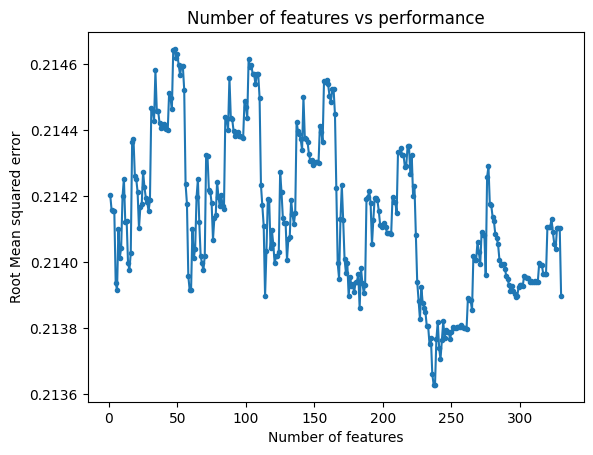

In [69]:
# Plot the elbow curve of the RFE
plt.plot(range(1, len(results_ridge_of['rmse']) +1), results_ridge_of['rmse'][:], marker='.')
plt.xlabel('Number of features')
plt.ylabel('Root Mean squared error')
plt.title('Number of features vs performance')
plt.show()

In [70]:
# Print the results of the best model
best_model_idx = np.argmin(results_ridge_of['rmse'])
print(f"N features: {results_ridge_of['num_features'][best_model_idx]}")
print(f"Best model: {results_ridge_of['features_selected'][best_model_idx]}")
print(f"Best rmse: {results_ridge_of['rmse'][best_model_idx]}")
print(f"Best r2: {results_ridge_of['r2'][best_model_idx]}")
print(f"Best alpha: {results_ridge_of['alpha'][best_model_idx]}")

N features: 17
Best model: ['lbp_mean', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_35', 'hog_50', 'hog_159', 'Face', 'Accessory', 'Group', 'Collage', 'Blur']
Best rmse: 0.2136289442146603
Best r2: -0.00626757377904652
Best alpha: 100


# Test all the best Models in the test set

In [71]:
# Get the test data

test_data = pd.read_csv('test_features.csv')

metadata = pd.read_csv('test0.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
test_data = pd.merge(test_data, metadata, on='Id', how='outer')

X_test = test_data.drop('Id', axis=1).drop('Pawpularity', axis=1) 
y_test = test_data['Pawpularity']


In [72]:
# Get all the best performing models and test them on the test set
# Add the metrics of each model to a dataframe

####################
# Linear Regression
# Normal
# Get the best performing model and display the results
best_idx_lr = np.argmin(rmse_list_lr)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train[ftrs_lr[best_idx_lr]], y_train)
y_pred = lin_reg_model.predict(X_test[ftrs_lr[best_idx_lr]])
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_r2 = r2_score(y_test, y_pred)

# Outlier Free
best_idx_lr_of = np.argmin(rmse_list_lr_of)
lin_reg_of_model = LinearRegression()
lin_reg_of_model.fit(of_X_train[ftrs_lr[best_idx_lr]], of_y_train)
y_pred = lin_reg_of_model.predict(X_test[ftrs_lr[best_idx_lr]])
lin_reg_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_of_r2 = r2_score(y_test, y_pred)


####################
# SVR
# Normal
X_test_scaled = scaler.transform(X_test)
y_pred = best_estimator_svr.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_r2 = r2_score(y_test, y_pred)

# Outlier Free
X_test_scaled = scaler_of.transform(X_test)
y_pred = best_estimator_of.predict(X_test_scaled)
svr_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_of_r2 = r2_score(y_test, y_pred)

####################
# Decision Tree
# Normal
y_pred = best_estimator_dt.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_r2 = r2_score(y_test, y_pred)

# Outlier Free
y_pred = best_estimator_dt.predict(X_test)
dt_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_of_r2 = r2_score(y_test, y_pred)

####################
# Random Forest 100 trees
# Normal
y_pred = model_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test, y_pred)

# Outlier Free
y_pred = model_rf_of.predict(X_test)
rf_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_of_r2 = r2_score(y_test, y_pred)

# Random Forest 80 trees
# Normal
y_pred = model_rf_80.predict(X_test)
rf_80_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_80_r2 = r2_score(y_test, y_pred)

# Outlier Free
y_pred = model_rf_of_80.predict(X_test)
rf_of_80_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_of_80_r2 = r2_score(y_test, y_pred)

# Random Forest 30 trees
# Normal
y_pred = model_rf_30.predict(X_test)
rf_30_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_30_r2 = r2_score(y_test, y_pred)

# Outlier Free
y_pred = model_rf_of_30.predict(X_test)
rf_of_30_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_of_30_r2 = r2_score(y_test, y_pred)

####################
# Ridge Regression
# Normal
ridge_best_idx = np.argmin(results['rmse'])
ridge_of_model = Ridge(alpha=results['alpha'][ridge_best_idx])
ridge_of_model.fit(of_X_train[results['features_selected'][ridge_best_idx]], of_y_train)
y_pred = ridge_of_model.predict(X_test[results['features_selected'][ridge_best_idx]])
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_r2 = r2_score(y_test, y_pred)

# Outlier Free
# Print the results of the best model
ridge_of_best_idx = np.argmin(results_ridge_of['rmse'])
ridge_of_model = Ridge(alpha=results_ridge_of['alpha'][ridge_of_best_idx])
ridge_of_model.fit(of_X_train[results_ridge_of['features_selected'][ridge_of_best_idx]], of_y_train)
y_pred = ridge_of_model.predict(X_test[results_ridge_of['features_selected'][ridge_of_best_idx]])
ridge_of_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_of_r2 = r2_score(y_test, y_pred)


####################
# Create a dataframe to store the results
results_df = pd.DataFrame(columns=['model', 'rmse', 'r2'])
results_df.loc[0] = ['Linear Regression', lin_reg_rmse, lin_reg_r2]
results_df.loc[1] = ['Linear Regression (outlier free)', lin_reg_of_rmse, lin_reg_of_r2]
results_df.loc[2] = ['SVR', svr_rmse, svr_r2]
results_df.loc[3] = ['SVR (outlier free)', svr_of_rmse, svr_of_r2]
results_df.loc[4] = ['Decision Tree', dt_rmse, dt_r2]
results_df.loc[5] = ['Decision Tree (outlier free)', dt_of_rmse, dt_of_r2]
results_df.loc[6] = ['Random Forest (100 trees)', rf_rmse, rf_r2]
results_df.loc[7] = ['Random Forest (outlier free) (100 trees)', rf_of_rmse, rf_of_r2]
results_df.loc[8] = ['Random Forest (80 trees)', rf_80_rmse, rf_80_r2]
results_df.loc[9] = ['Random Forest (outlier free) (80 trees)', rf_of_80_rmse, rf_of_80_r2]
results_df.loc[10] = ['Random Forest (30 trees)', rf_30_rmse, rf_30_r2]
results_df.loc[11] = ['Random Forest (outlier free) (30 trees)', rf_of_30_rmse, rf_of_30_r2]
results_df.loc[12] = ['Ridge Regression', ridge_rmse, ridge_r2]
results_df.loc[13] = ['Ridge Regression (outlier free)', ridge_of_rmse, ridge_of_r2]

results_df

,model,rmse,r2
0,Linear Regression,0.403440,-0.906681
1,Linear Regression (outlier free),0.404367,-0.915455
2,SVR,0.388433,-0.767476
3,SVR (outlier free),0.387492,-0.758925
4,Decision Tree,0.377429,-0.668747
5,Decision Tree (outlier free),0.377429,-0.668747
6,Random Forest (100 trees),0.328126,-0.261255
7,Random Forest (outlier free) (100 trees),0.348236,-0.420590
8,Random Forest (80 trees),0.312168,-0.141560
9,Random Forest (outlier free) (80 trees),0.382688,-0.715577
